***Sentiment Analysis using LSTM in TensorFlow***

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.7000 - loss: 0.6912
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6000 - loss: 0.6935
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6000 - loss: 0.6909
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6000 - loss: 0.6915
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5000 - loss: 0.6913
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5000 - loss: 0.6948
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6000 - loss: 0.6921
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5000 - loss: 0.6893
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5000 - loss: 0.6944
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4000 - loss: 0.6984
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6000 - loss: 0.6943
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5000 - loss

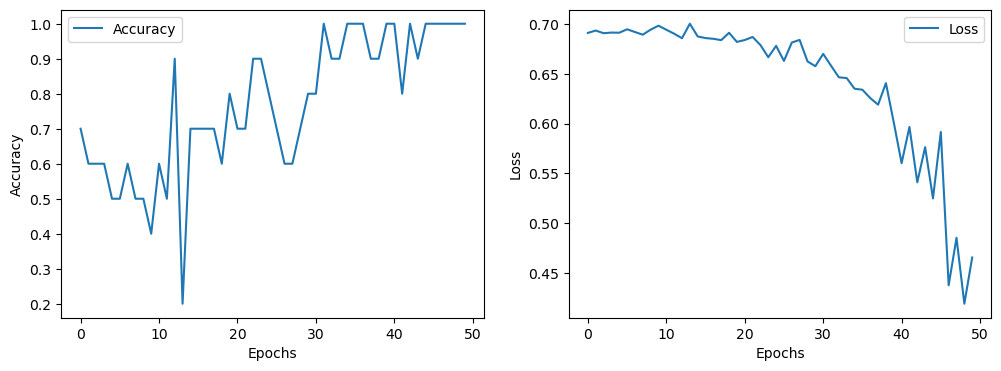

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
Text: I love this! -> Sentiment: Positive
Text: This is so bad. -> Sentiment: Positive
Text: Absolutely amazing product! -> Sentiment: Positive
Text: Worst experience ever. -> Sentiment: Negative


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Sample Dataset (Sentiment Analysis: 1 = Positive, 0 = Negative)
dataset = {
    "text": [
        "I love this product!", "This is the worst thing ever.",
        "Absolutely fantastic!", "I hate it.",
        "Very well made, great quality.", "Not worth the money.",
        "Highly recommended!", "Terrible experience.",
        "Best purchase I've made!", "Awful, never buying again."
    ],
    "label": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

# Convert to DataFrame
df = pd.DataFrame(dataset)
df = shuffle(df)  # Shuffle data to avoid bias

# Tokenization & Padding
max_vocab = 1000  # Max words in vocabulary
max_length = 10    # Max length of input sequences
tokenizer = Tokenizer(num_words=max_vocab, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Splitting Data
X_train, y_train = padded_sequences, np.array(df['label'])

# Model Building
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_vocab, output_dim=16, input_length=max_length),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Helps prevent overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, verbose=1)  # Increased epochs

# Plot Accuracy & Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function for Testing New Sentences
def predict_sentiment(texts):
    new_sequences = tokenizer.texts_to_sequences(texts)
    new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post')
    predictions = model.predict(new_padded)
    for i, text in enumerate(texts):
        sentiment = "Positive" if predictions[i] > 0.3 else "Negative"  # Adjusted threshold
        print(f"Text: {text} -> Sentiment: {sentiment}")

# Example Test Cases
predict_sentiment(["I love this!", "This is so bad.", "Absolutely amazing product!", "Worst experience ever."])


In [6]:
new_texts = ["I love this!", "This is so bad."]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded = pad_sequences(new_sequences, maxlen=10, padding='post')
predictions = model.predict(new_padded)

for i, text in enumerate(new_texts):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Text: {text} -> Sentiment: {sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Text: I love this! -> Sentiment: Positive
Text: This is so bad. -> Sentiment: Negative
